Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


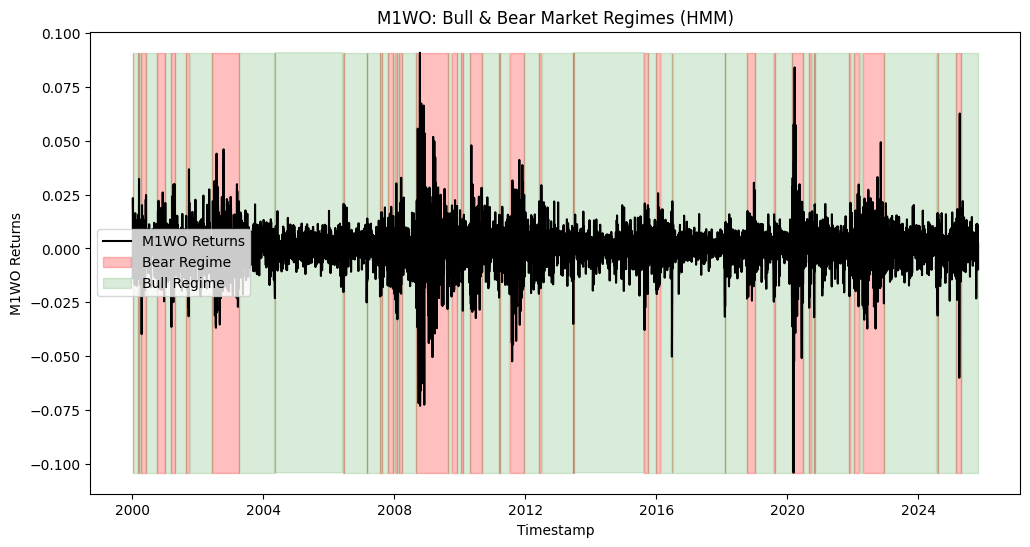

In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.Bootstrapping.models_classification as modl

import numpy as np
import pandas as pd
df = dp.create_classification_data(quiet=False)

In [2]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

pred_df, pred_draws_df = modl.expanding_oos_refit_every_cls_bootstrap_binary(
    data=df,
    feature_cols=feature_cols,
    target_col="state",
    model="logit",     # or "logit"/"rf"
    refit_every=3000,
    n_boot=200,
    bootstrap_method="block",
    bootstrap_block_len=30,
    bootstrap_n_jobs=8,
)

# point accuracy from mean probs
acc = (pred_df.y_true == pred_df.y_pred).mean()

# example: compute per-date std of bootstrap probs
per_date_std = pred_draws_df["p1"].groupby("timestamp").std()
#safe this as bootstrapped csv
pred_draws_df.to_csv("../../Data/ModelData/Classification/pred_draws_df_logit.csv")

[logit+bootstrap] refit at 2010-01-01 using data up to 2009-12-31 | predicted 3000 days | B=200
[logit+bootstrap] refit at 2021-07-02 using data up to 2021-07-01 | predicted 1131 days | B=200
